# Итоговая работа по модулю "Математика для Data Science"

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
def find_my_key(dictionary, value):
    """функция, которая принимает на вход словарь и значение из словаря, а на выводе даёт ключ этого значения"""
    for key, val in dictionary.items():
        if val == value:
            return key

In [4]:
# создадим словарь для пользователей y, т.е. тех с кем первого пользователя будем сравнивать по углу, принято так как удобно
# хранить номера пользователя в виде ключа и его значения угла, где есть однозначное соответствие
alpha_user2 = {}
print('а) Ответ:')
for user1 in range(0, len(raitings)):
    alpha_user2.clear()
    for user2 in range(0, len(raitings)):
        if user1 != user2:
            alpha_id = np.rad2deg(np.arccos(np.dot(raitings[user1], raitings[user2]) / (np.linalg.norm(raitings[user1]) * np.linalg.norm(raitings[user2]))))
            alpha_user2.setdefault(user2, alpha_id)
    # сортировка использована для наискорейшего определения минимума из всех значений, т.к это будет нулевой элемент в списке значений
    alpha2 = sorted(alpha_user2.values())
    print(user1, find_my_key(alpha_user2, alpha2[0]))
    alpha_user2.clear()

а) Ответ:
0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2



b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [5]:
# импортируем библеотеки для PCA метода уменьшения размерности данных, потеряв наименьшее количество информации и один из критериев качества восстановления 
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

<Figure size 432x288 with 0 Axes>

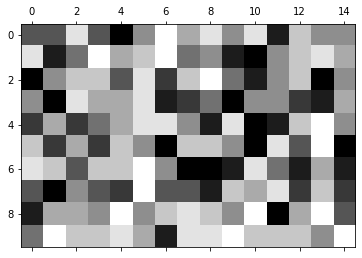

In [6]:
# построим отображения нашего массива raitings для наглядного сравнения результата работы PCA
plt.gray() 
plt.matshow(raitings) 
plt.show() 

In [7]:
# уменьшим размерность данных до 5 признаков(фильмов) и построим что получилось
pca = PCA(n_components = 5)
raitings_reduction = pca.fit_transform(raitings)

<Figure size 432x288 with 0 Axes>

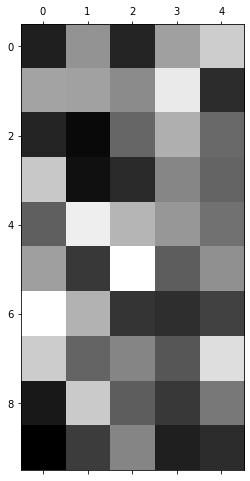

In [8]:
plt.gray() 
plt.matshow(raitings_reduction) 
plt.show() 

In [9]:
# восстановим данные до первоначальной размерности и построим 
raitings_restore = pca.inverse_transform(raitings_reduction)

<Figure size 432x288 with 0 Axes>

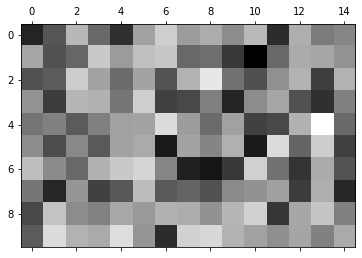

In [10]:
plt.gray() 
plt.matshow(raitings_restore) 
plt.show() 

In [11]:
# расчёт точности восстановления через средне квадратическую ошибку, идеальное восстановление 0, у нас достаточно большое
y_true = raitings
y_pred = raitings_restore
mean_squared_error(y_true, y_pred)

1.2455442696728185

In [12]:
# ради интереса построим зависимость ошибки и количества компонент для нашего случая
list_errors = []
components = []
for comp in range(0, 10):
    components.append(comp)
    pca = PCA(n_components = comp)
    raitings_reduction = pca.fit_transform(raitings)
    raitings_restore = pca.inverse_transform(raitings_reduction)
    y_true = raitings
    y_pred = raitings_restore
    list_errors.append(mean_squared_error(y_true, y_pred))

Text(0, 0.5, 'ошибка восстановления (MSE)')

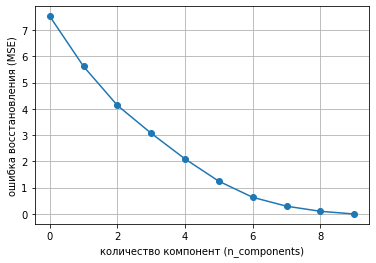

In [13]:
plt.plot(components, list_errors, ls='-', marker='o')
plt.grid()

plt.xlabel('количество компонент (n_components)')
plt.ylabel('ошибка восстановления (MSE)')

## Вывод
Таким образом, наименьшее ошибка для данных raitings получится при n >= 8, чтобы потеря данных была наименьшей при восстановлении

## Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [14]:
from scipy.misc  import derivative 
from sympy import *

In [15]:
# объявим переменную х
x = symbols('x')
# выведем функцию в виде текста 
f_x =  tan( sin (x) + cos(2 * x + 3)) ** 2
print("Before Differentiation : f(x) = {}".format(f_x))
# объявим нашу функцию
def f(x):
    return tan( sin (x) + cos(2 * x + 3)) ** 2

Before Differentiation : f(x) = tan(sin(x) + cos(2*x + 3))**2


In [16]:
# продифференцируем с выводом на экран нашу функцию
dif = diff(f_x, x)
  
print("After First Differentiation : f'(x) = {}".format(dif))
# возьмём первую производную нашей функции f(x=1)
df = derivative(f, 1.0, dx=1e-6)

print("f'(xо=1) = {}".format(df))

After First Differentiation : f'(x) = 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
f'(xо=1) = 55.3859176433136


### Вычисление производной на бумаге

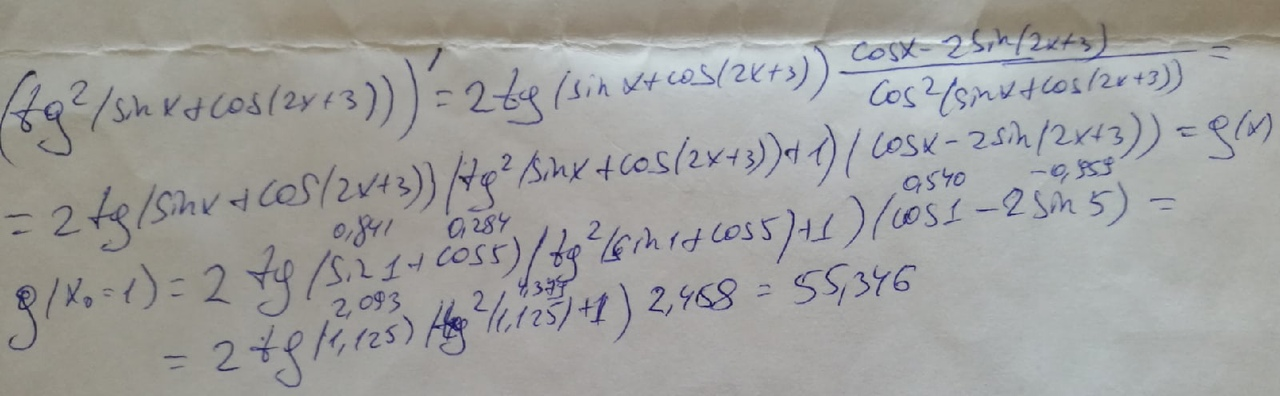

In [17]:
# подгрузка библиотеки для импорта изображения с компьютера
from IPython import display
display.Image('C:/Netology/M3.Mathematics/FinalWork/Vhf6xQK_po8.jpg')

### Вывод
Результаты на бумаге и в python практически совпали с той ошибкой, что на бумаге все значения тригонометрических функций округлялись до 3-х знаков после запятой и считались на калькуляторе. В остальной производная была взята верно, надо было учитывать, что это производная сложной функции, и вспомнить, что 1/cos2(x) = tg2(x) + 1, в остальном особенностей не было.

## Задание 3¶
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [37]:
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

In [38]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [39]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [40]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

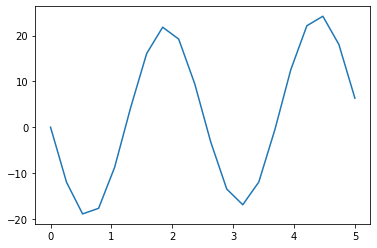

In [41]:
plt.plot(x, fx)
plt.show()

In [42]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [43]:
bounds = [(0,5),(-20,25)]

In [44]:
# 1 способ нахождения a,b minimize
# поиск локальных минимумов на границе по x и по fx, [0,0] это начальное приближение
res = minimize(error, [0, 0], method='COBYLA')
res

     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

In [45]:
# 2 способ нахождения a,b differential_evolution
# поиск глобального минимума, bounds - это границы для х, у
result = differential_evolution(error, bounds)
result

     fun: 1.5110343962732031e-06
     jac: array([139.91879775, 502.58793681])
 message: 'Optimization terminated successfully.'
    nfev: 2043
     nit: 65
 success: True
       x: array([ 3. , -2.5])

## Вывод
Нахождение оптимальных параметров a, b, минимизирующие абсолютную ошибку error было произведено двумя способами, и оба показали один результат с учётом небольшой погрешности. Надо отметить, что важными параметрами для расчёта являются [0, 0] - начальная точка в методе minimize и bounds - границы для x,y в differential_evolution

## Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [27]:
# случайноая величина с 20 значениями от 0 до 100
x = np.random.randint(0, 100, 20)

Text(0.5, 0, '$x$')

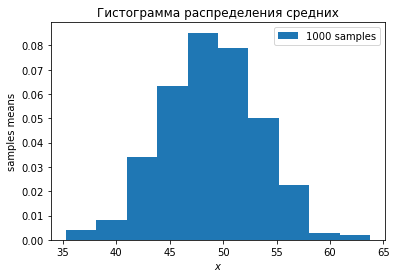

In [28]:
# Массив для сохранения средних по выборкам
mean = np.array([])
# цикл для формирования массива 1000 выборочных средних
for number in range(0, 1000):
    sample = np.random.choice(x, 50)
    mean = np.append(mean, np.mean(sample))
plt.title('Гистограмма распределения средних')    
plt.hist(mean, density=True, label = '1000 samples')
plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

### Вывод
В соответствие с Центральной предельной теоремой на графике видно, что выборочные средние стремяться к мат ожиданию нормального распределения случайной величины.

## Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [29]:
# исследумая матрица 2*2
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [30]:
# импортируем библиотеку linalg из numpy для вычисления собственных значений и векторов
from numpy import linalg as LA

In [31]:
# на выходе метода eig w - собственные числа, v - собственных вектора 
w,v = LA.eig(m)
w,v 

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

In [32]:
# проверка левой части равенства m * v = w * v 
np.dot(m,v)

array([[ 2.68328157,  0.89442719],
       [ 1.34164079, -0.4472136 ]])

In [33]:
# проверка правой части равенства m * v = w * v 
w*v

array([[ 2.68328157,  0.89442719],
       [ 1.34164079, -0.4472136 ]])

### Вывод
Проверка равенства  m * v = w * v  сошлась, следовательно, собственные числа и собственные векторы были найдены верно

### Вычисление собственных чисел и собственных векторов на бумаге

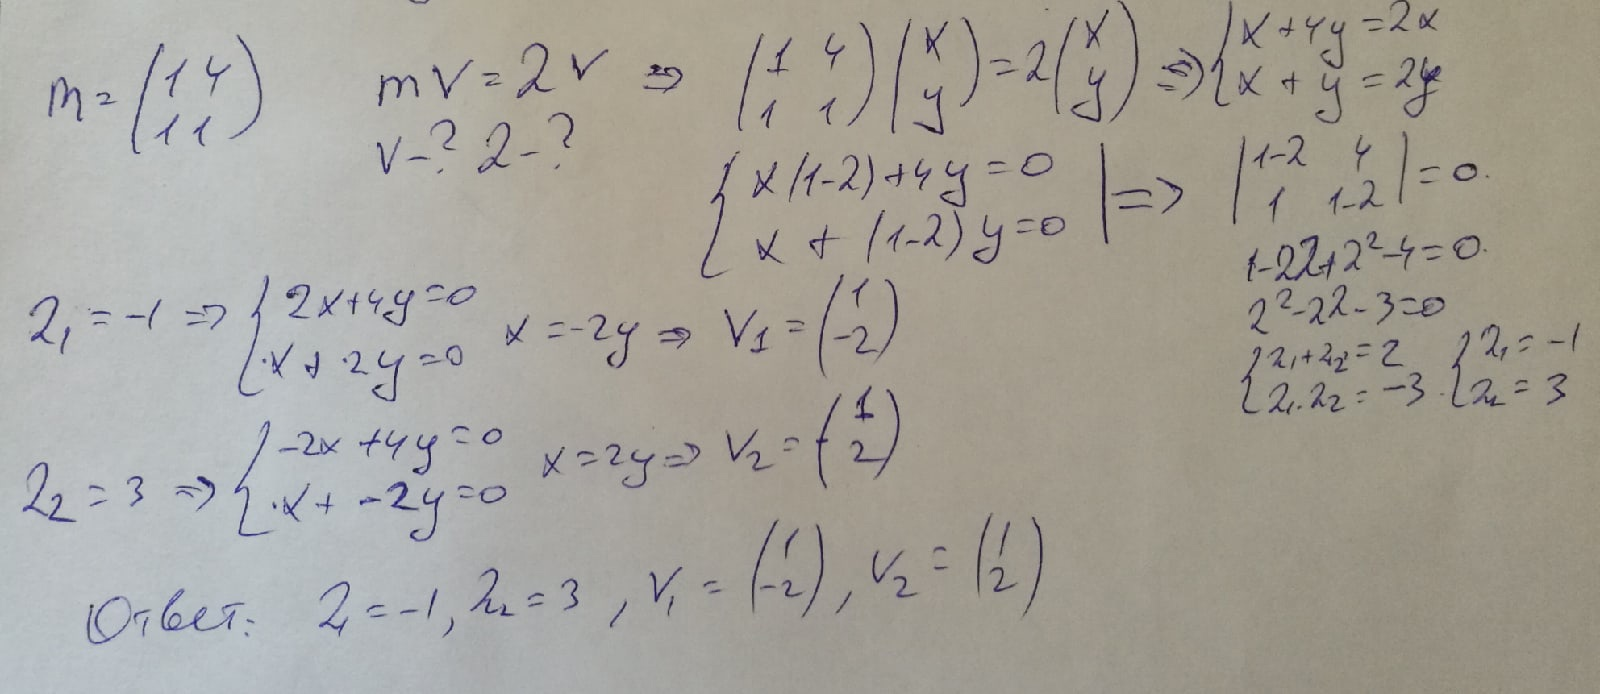

In [34]:
from IPython import display
display.Image('C:/Netology/M3.Mathematics/FinalWork/Wr_cPTBZ-9Q.jpg')

### Вывод
Есть расхождение в ответе в собственных векторах, т.к. это вектор, который указывает направление, координаты могут принимать бесконечное множество, лишь бы удовлетворяли уравнению вектора, которое можно видеть для v1 и v2 на бумаге.